# Mask R-CNN Demo

A quick intro to using the pre-trained model to detect and segment objects.

In [2]:
## STANDARD PYTHON LIBS
import os
import re
import sys
import cv2
import PIL
import math
import time
import random
import skimage
import scipy.misc
import matplotlib
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
# %matplotlib inline

## ADDING TO SYS
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '../'))
sys.path.append(ROOT_DIR)

## CUSTOM LIBS
import src.coco as coco
from src.model import log
import src.utils as utils
import src.model as modellib
from src.config import Config
import src.visualize as visualize

# GPU LIBS
import keras
import tensorflow as tf

print ('TF : ', tf.__version__, '  Keras : ', keras.__version__)

# if utils.check_gpu(verbose=0):
#     pass
# else:
#     sys.exit(1)

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TF :  1.6.0   Keras :  2.1.4


Using TensorFlow backend.


In [3]:
MODEL_DIR = os.path.join(ROOT_DIR, "demo", "logs")

COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'demo', 'model', "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")
IMAGE_DIR = '/home/play/data/detectron/demo_self/raw'

MODEL_DIR = COCO_MODEL_PATH

## Configurations

We'll be using a model trained on the MS-COCO dataset. The configurations of this model are in the ```CocoConfig``` class in ```coco.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```CocoConfig``` class and override the attributes you need to change.

In [4]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
# config.display()

## Create Model and Load Trained Weights

In [6]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

In [7]:
# Load weights trained on MS-COCO
model.load_weights(COCO_MODEL_PATH, by_name=True)

## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't. For example, in the MS-COCO dataset, the 'person' class is 1 and 'teddy bear' is 88. The IDs are often sequential, but not always. The COCO dataset, for example, has classes associated with class IDs 70 and 72, but not 71.

To improve consistency, and to support training on data from multiple sources at the same time, our ```Dataset``` class assigns it's own sequential integer IDs to each class. For example, if you load the COCO dataset using our ```Dataset``` class, the 'person' class would get class ID = 1 (just like COCO) and the 'teddy bear' class is 78 (different from COCO). Keep that in mind when mapping class IDs to class names.

To get the list of class names, you'd load the dataset and then use the ```class_names``` property like this.
```
# Load COCO dataset
dataset = coco.CocoDataset()
dataset.load_coco(COCO_DIR, "train")
dataset.prepare()

# Print class names
print(dataset.class_names)
```

We don't want to require you to download the COCO dataset just to run this demo, so we're including the list of class names below. The index of the class name in the list represent its ID (first class is 0, second is 1, third is 2, ...etc.)

In [8]:
# COCO Class names
# Index of the class in the list is its ID. For example, to get ID of
# the teddy bear class, use: class_names.index('teddy bear')
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

## Run Object Detection

 ---> Processing 1 images
 ----> image             shape: (1080, 1920, 3)       min:    0.00000  max:  255.00000
 ----> molded_images     shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000
 ----> image_metas       shape: (1, 89)               min:    0.00000  max: 1920.00000
 -----> Mask (1, 100, 28, 28, 81)


<IPython.core.display.Javascript object>


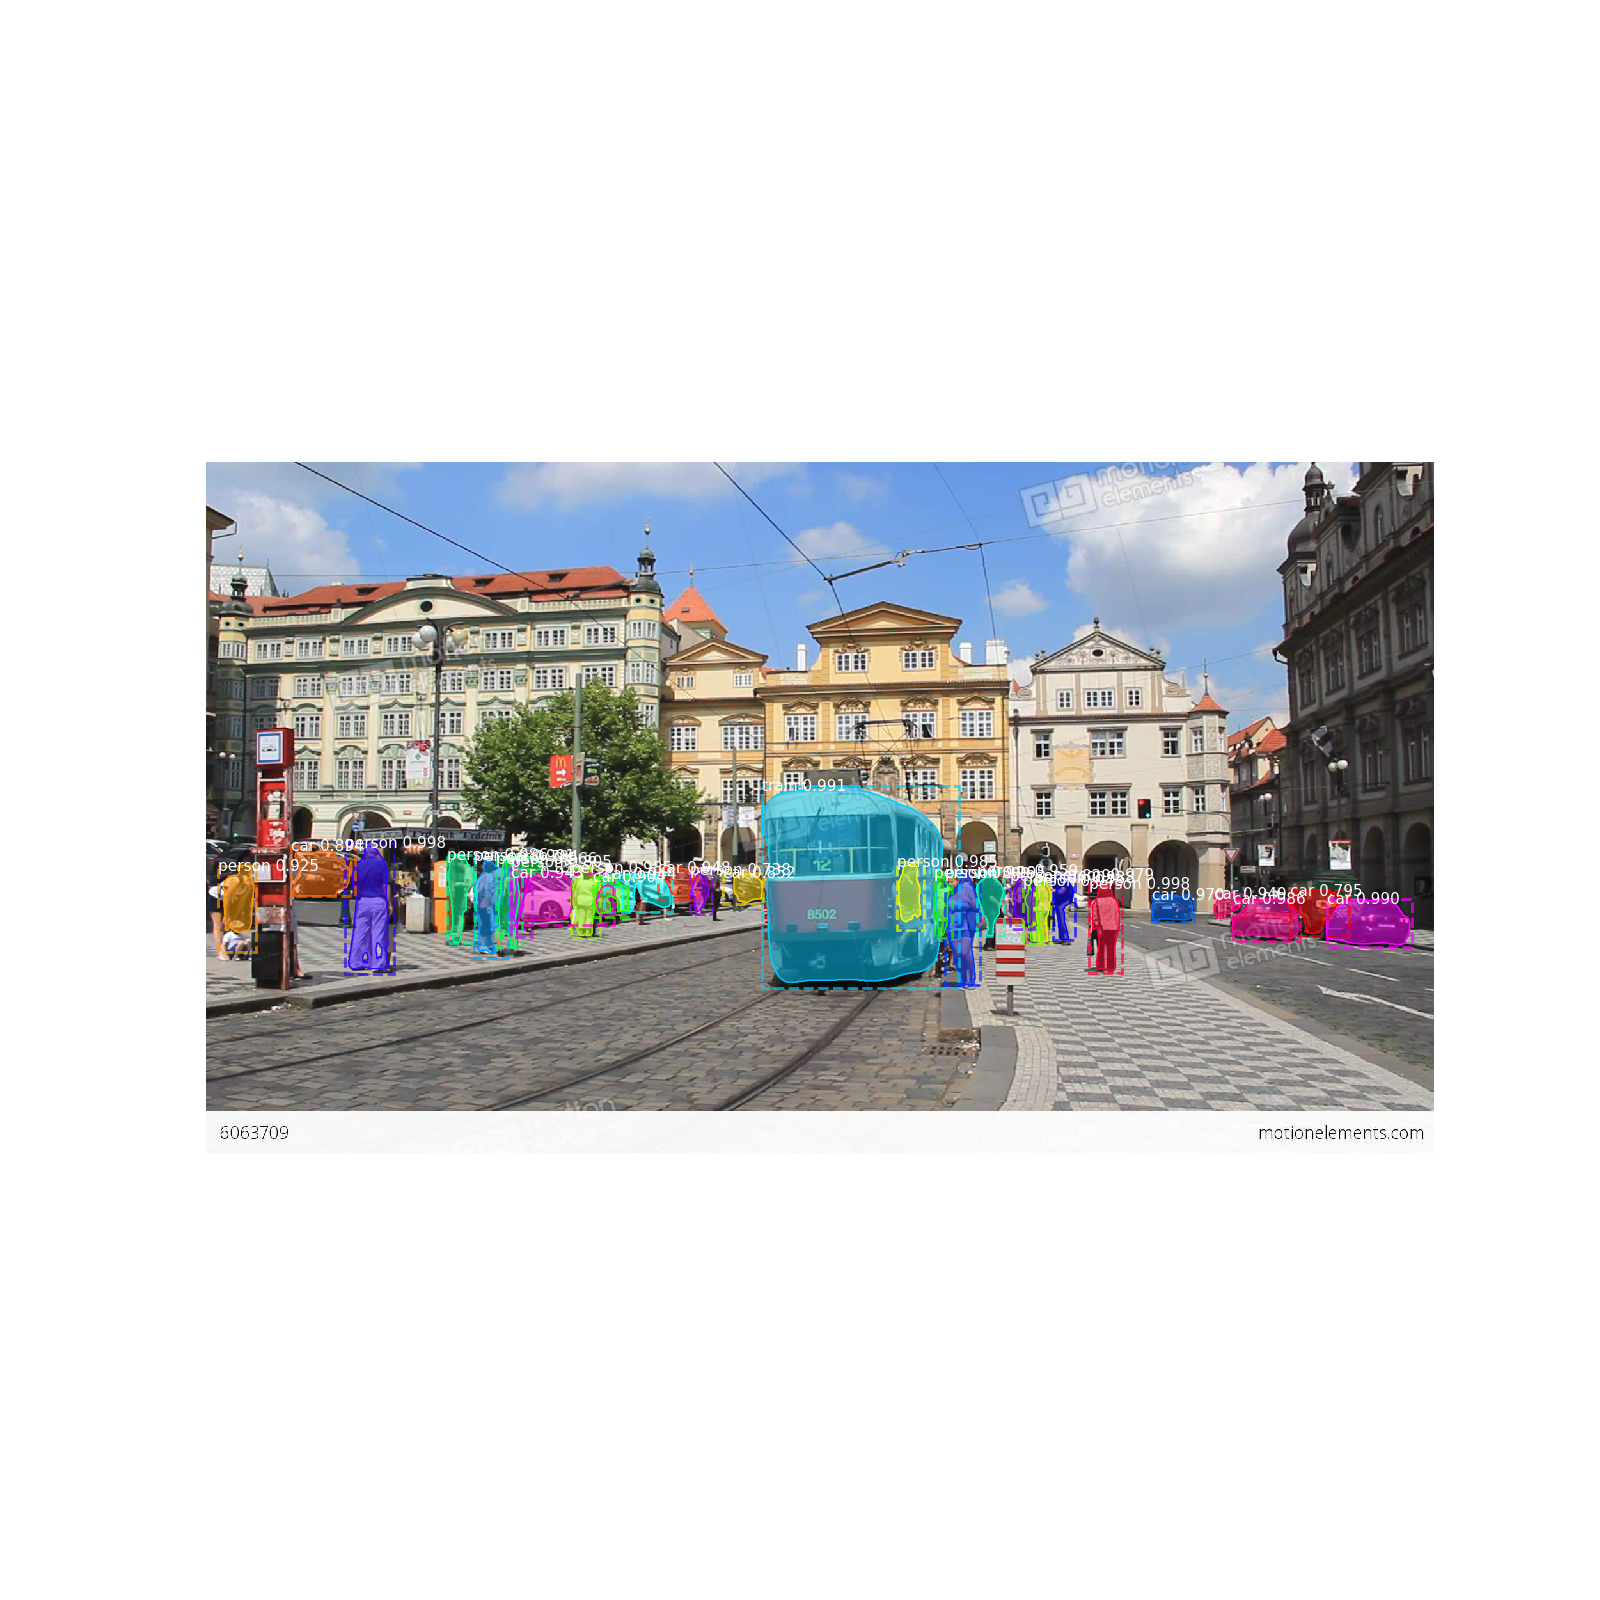

In [9]:
# Load a random image from the images folder
# file_names = next(os.walk(IMAGE_DIR))[0]
# image = skimage.io.imread(os.path.join(IMAGE_DIR, random.choice(file_names)))
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'image1.jpg'))

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'])

(1080, 1920, 30)


<IPython.core.display.Javascript object>


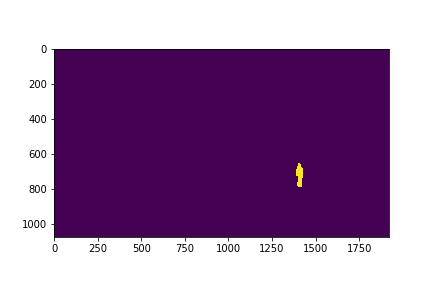

KeyboardInterrupt: 

In [35]:
print (r['masks'].shape)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

for num in range(r['masks'].shape[-1]):
    plt.imshow(r['masks'][:, :, num])
    fig.canvas.draw()
    time.sleep(1)

In [36]:
plt.close()

# SCRATCHPAD

In [32]:
%%timeit
image = skimage.io.imread(os.path.join(IMAGE_DIR, 'image1.jpg'))
results = model.detect([image], verbose=0)

 -----> Mask (1, 100, 28, 28, 81)
 -----> Mask (1, 100, 28, 28, 81)
 -----> Mask (1, 100, 28, 28, 81)
 -----> Mask (1, 100, 28, 28, 81)
 -----> Mask (1, 100, 28, 28, 81)
 -----> Mask (1, 100, 28, 28, 81)
 -----> Mask (1, 100, 28, 28, 81)
 -----> Mask (1, 100, 28, 28, 81)
980 ms ± 6.22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
# Sunning over all masks
masks_sum = np.sum(r['masks'], axis=2)
np.unique(masks_sum)

array([0, 1, 2, 3], dtype=uint64)

Hence, some pixels belong to multiple masks.

1910788.0 pixels belong to 0 masks
157550.0 pixels belong to 1 mask
5222.0 pixels belong to 2 masks
40.0 pixels belong to 3 masks


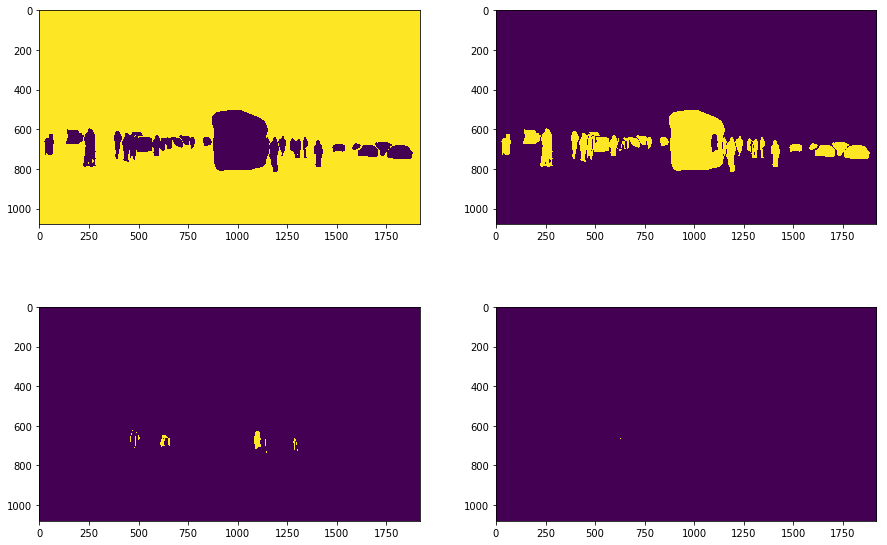

In [50]:
%matplotlib inline
plt.figure(figsize=(15, 10))
plt.subplot(221)
a = np.zeros((r['masks'].shape[0], r['masks'].shape[1]))
a[np.where(masks_sum == 0)] = 1
print(np.sum(a), "pixels belong to 0 masks")
plt.imshow(a)
plt.subplot(222)
a = np.zeros((r['masks'].shape[0], r['masks'].shape[1]))
a[np.where(masks_sum == 1)] = 1
print(np.sum(a), "pixels belong to 1 mask")
plt.imshow(a)
plt.subplot(223)
a = np.zeros((r['masks'].shape[0], r['masks'].shape[1]))
a[np.where(masks_sum == 2)] = 1
print(np.sum(a), "pixels belong to 2 masks")
plt.imshow(a)
plt.subplot(224)
a = np.zeros((r['masks'].shape[0], r['masks'].shape[1]))
a[np.where(masks_sum == 3)] = 1
print(np.sum(a), "pixels belong to 3 masks")
plt.imshow(a)

In [54]:
np.where(masks_sum == 2)

(array([623, 624, 624, ..., 747, 747, 747]),
 array([ 473,  470,  471, ..., 1304, 1305, 1306]))

In [12]:
type(r['masks'][0, 0, 1])

numpy.uint8

In [14]:
w, h = r['masks'].shape[:2]

In [21]:
round(1024./w*h)

1820